In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import numpy as np
import itertools

# Task 1

# HOG Descriptor

# Task 2

### Experiment: The Case for Randomly Balancing Trees!

In [50]:
old_hog_balanced = [
    (1, 78.2447),
    (2, 82.2233),
    (4, 88.0153),
    (8, 86.1273),
    (16, 92.1449),
    (32, 93.3715),
    (64, 95.0348),
    (128, 94.6581)
]

old_hog_imbalanced = [
    (1, 81.3025),
    (2, 81.3025),
    (4, 81.3025),
    (8, 81.3025),
    (16, 81.3025),
    (32, 81.3025),
    (64, 81.3025),
    (128, 81.3025)
]

dfBalanced = pd.DataFrame(old_hog_balanced, columns=['Trees', 'Accuracy'])
dfImBalanced = pd.DataFrame(old_hog_imbalanced, columns=['Trees', 'Accuracy'])

Text(0.5,1,'Random Balancing Impact on Accuracy')

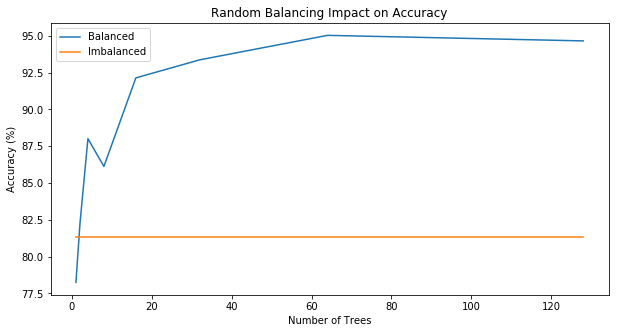

In [52]:
ax = plt.gca()

ax.figure.set_size_inches(10,5)

dfBalanced.plot(x='Trees', y='Accuracy', ax=ax)
dfImBalanced.plot(x='Trees', y='Accuracy', ax=ax)

ax.legend([ 'Balanced', 'Imbalanced' ])

ax.set_xlabel('Number of Trees')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Random Balancing Impact on Accuracy')

### Experiment: The case for depth!

In [56]:
depth_5 = [
    (1, 72.8473),
    (2, 80.5791),
    (4, 85.6878),
    (8, 88.1182),
    (16, 92.1182),
    (32, 92.2367),
    (64, 91.4431),
    (128, 93.3858),
]

depth_10 = [
    (1, 83.2788),
    (2, 83.9731),
    (4, 86.1781),
    (8, 89.5902),
    (16, 92.7059),
    (32, 94.2376),
    (64, 95.2996),
    (128, 96.195)
]

depth_20 = [
    (1, 76.1066),
    (2, 78.6268),
    (4, 87.7645),
    (8, 94.372),
    (16, 92.1927),
    (32, 94.5037),
    (64, 96.2906),
    (128, 96.1411),
]

depth_40 = [
    (1, 73.8568),
    (2, 82.6695),
    (4, 87.9425),
    (8, 93.3715),
    (16, 94.5425),
    (32, 96.2367),
    (64, 93.596),
    (128, 95.1514),
]

depth_80 = [
    (1, 78.0934),
    (2, 74.8125),
    (4, 90.7216),
    (8, 92.2134),
    (16, 96.5016),
    (32, 94.0887),
    (64, 95.0348),
    (128, 96.2906),
]

df_depth_5 = pd.DataFrame(depth_5, columns=['Depth', 'Accuracy'])
df_depth_10 = pd.DataFrame(depth_10, columns=['Depth', 'Accuracy'])
df_depth_20 = pd.DataFrame(depth_20, columns=['Depth', 'Accuracy'])
df_depth_40 = pd.DataFrame(depth_40, columns=['Depth', 'Accuracy'])
df_depth_80 = pd.DataFrame(depth_80, columns=['Depth', 'Accuracy'])

Text(0.5,1,'Depth Impact on Accuracy')

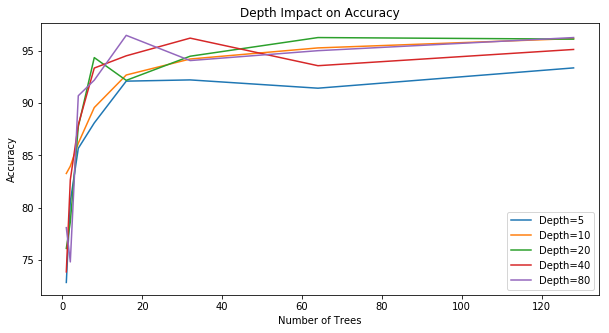

In [58]:
ax = plt.gca()

ax.figure.set_size_inches(10,5)

df_depth_5.plot(x='Depth', y='Accuracy', ax=ax)
df_depth_10.plot(x='Depth', y='Accuracy', ax=ax)
df_depth_20.plot(x='Depth', y='Accuracy', ax=ax)
df_depth_40.plot(x='Depth', y='Accuracy', ax=ax)
df_depth_80.plot(x='Depth', y='Accuracy', ax=ax)

ax.legend([
    'Depth=5',
    'Depth=10',
    'Depth=20',
    'Depth=40',
    'Depth=80'
])

ax.set_xlabel('Number of Trees')
ax.set_ylabel('Accuracy')
ax.set_title('Depth Impact on Accuracy')

### Wait! But how random is random? And, in what scope?
1. C++ Seeds are not random. They need to be seeded to avoid duplicating sequence of numbers.
2. Seeding a random number generator works within a function scope. If done in `main`, sequences would repeat within functions where the random generator is called.

# Task 3

## Histogram Of Gradients: Hyperparameter Search

### Starting Point
I read the following paper:
```
Dalal N, Triggs B. Histograms of oriented gradients for human detection. InComputer Vision and Pattern Recognition, 2005. CVPR 2005. IEEE Computer Society Conference on 2005 Jun 25 (Vol. 1, pp. 886-893). IEEE.
```
Dalal and Triggs suggested the following:
```
The stride (block overlap) is fixed at half of the block size. 3×3 blocks of 6×6 pixel cells perform best, with 10.4% miss rate.
```

From the above, we took inferred the following:
1. Block stride is half the block size (i.e. we stride on a cell-by-cell basis).
2. Block sizes are 2 (or, 3) times the cell size.

Now, we are checking the **window size (and, thus, number of features)** as our hyperparameter.

### Experiment 1: Window Size

In [29]:
experiment = [
    (24, 24, 12, 12, 36, 78.6813),
    (48, 24, 12, 12, 324, 82.2909),
    (72, 24, 12, 12, 900, 75.2025),
    (96, 24, 12, 12, 1764, 77.8477),
    (120, 24, 12, 12, 2916, 74.942),
    (144, 24, 12, 12, 4356, 74.8697)
]

dfBenchmarkWindowSize  = pd.DataFrame(experiment, columns=[
    'WinSize', 'BlockSize', 'BlockStride', 'CellSize', 'Features', 'Accuracy'
])

In [35]:
dfBenchmarkWindowSize['FeaturesNormalized'] = 70 + 30 * dfBenchmarkWindowSize.Features / dfBenchmarkWindowSize.Features.max()

In [36]:
dfBenchmarkWindowSize

,WinSize,BlockSize,BlockStride,CellSize,Features,Accuracy,FeaturesNormalized
0,24,24,12,12,36,78.6813,70.247934
1,48,24,12,12,324,82.2909,72.231405
2,72,24,12,12,900,75.2025,76.198347
3,96,24,12,12,1764,77.8477,82.148760
4,120,24,12,12,2916,74.9420,90.082645
5,144,24,12,12,4356,74.8697,100.000000


Text(0.5,1,'Window Size Impact on Accuracy')

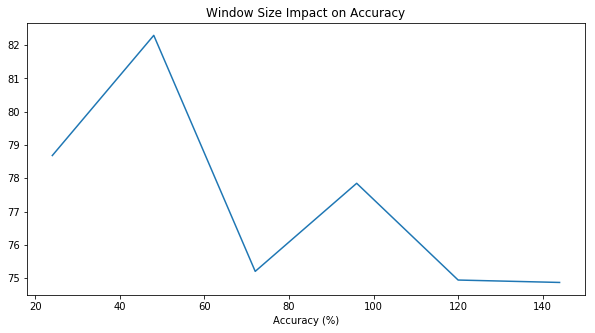

In [38]:
ax = plt.gca()

ax.figure.set_size_inches(10,5)

dfBenchmarkWindowSize.plot(x='WinSize', y='Accuracy', ax=ax, legend=False)

ax.set_xlabel('Window Size (Pixels)')
ax.set_xlabel('Accuracy (%)')
ax.set_title('Window Size Impact on Accuracy')

Text(0.5,1,'Window Size Impact on Features')

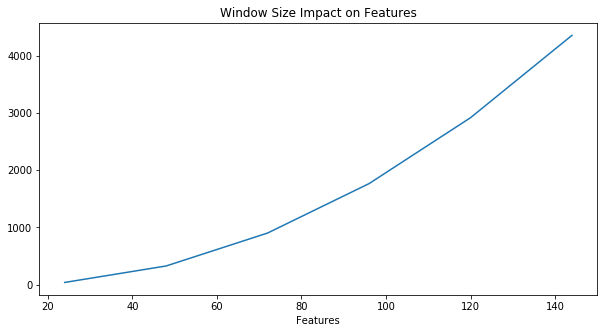

In [39]:
ax = plt.gca()

ax.figure.set_size_inches(10,5)

dfBenchmarkWindowSize.plot(x='WinSize', y='Features', ax=ax, legend=False)

ax.set_xlabel('Window Size (Pixels)')
ax.set_xlabel('Features')
ax.set_title('Window Size Impact on Features')

## Random Forrest: The Effect of Ensembles

### Histogram Hyperparameters
After some search, I found the best HOG window, block and cell sizes to be as follows:
1. Block sizes are 2 times the cell size.
2. Block stride is half the block size (i.e. we stride on a cell-by-cell basis).
3. Window sizes are 2 times the block size.

Our implementation parameters are:
1. Cell Size= (12, 12)
2. Block Size= (24, 24)
3. Block Stride= (12, 12)
4. Window Size = (48, 48)

We found also that:
1. The smaller the number of features, the easier the classifier separates them-- That yields in higher accuracy. **BUT!!! It leads to lots of confusion as well.** We need to check the confusion matrix.

### Random Forrest Hyperparameters

In [3]:
experiment = [
    (1, 81.9174, 72.5592, 92.1913, 81.2055),
    (4, 85.9841, 78.4351, 94.2314, 85.6107),
    (8, 92.3845, 88.1083, 96.815, 92.2567),
    (16, 96.1589, 93.7729, 98.5351, 96.095),
    (32, 97.8194, 96.6769, 98.9455, 97.7981),
    (64, 98.5457, 97.666, 99.4213, 98.5359),
    (128, 98.779, 98.1351, 99.4208, 98.7737)
]
 
dfBenchmarkNumberOfTrees = pd.DataFrame(experiment, columns=[
    'Trees', 'Accuracy', 'Precision', 'Recall', 'FScore'
])

In [4]:
dfBenchmarkNumberOfTrees

,Trees,Accuracy,Precision,Recall,FScore
0,1,81.9174,72.5592,92.1913,81.2055
1,4,85.9841,78.4351,94.2314,85.6107
2,8,92.3845,88.1083,96.8150,92.2567
3,16,96.1589,93.7729,98.5351,96.0950
4,32,97.8194,96.6769,98.9455,97.7981
5,64,98.5457,97.6660,99.4213,98.5359
6,128,98.7790,98.1351,99.4208,98.7737


Text(0.5,1,'Number of Trees Impact on Accuracy')

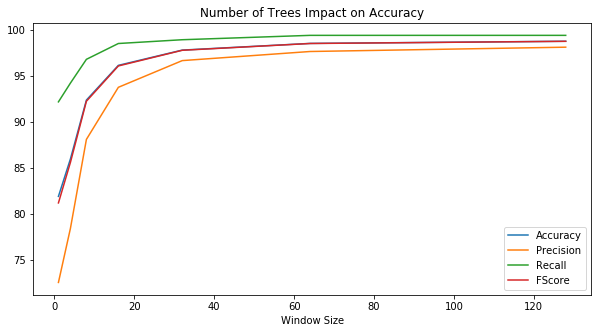

In [27]:
ax = plt.gca()

ax.figure.set_size_inches(10,5)

dfBenchmarkNumberOfTrees.plot(x='Trees', y='Accuracy', ax=ax)
dfBenchmarkNumberOfTrees.plot(x='Trees', y='Precision', ax=ax)
dfBenchmarkNumberOfTrees.plot(x='Trees', y='Recall', ax=ax)
dfBenchmarkNumberOfTrees.plot(x='Trees', y='FScore', ax=ax)

ax.legend([
    'Accuracy',
    'Precision',
    'Recall',
    'FScore'
])

ax.set_xlabel('Window Size')
ax.set_title('Number of Trees Impact on Accuracy')

### The Confusion Matrix

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Confusion Matrix: The Best Classifier (n= 128)

In [18]:
confusion_matrix_128 = np.array([[42,0,0,2],
[0,44,0,0],
[1,0,43,0],
[0,0,2,288]])

Confusion matrix, without normalization
[[ 42   0   0   2]
 [  0  44   0   0]
 [  1   0  43   0]
 [  0   0   2 288]]


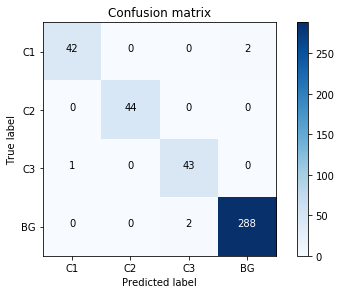

In [19]:
plot_confusion_matrix(confusion_matrix_128, ['C1', 'C2', 'C3', 'BG'])

#### Confusion Matrix: The Worst Classifier (n= 128)

Confusion matrix, without normalization
[[ 37   4   0   3]
 [  1  41   0   2]
 [  4   1  36   3]
 [ 13  15  25 237]]


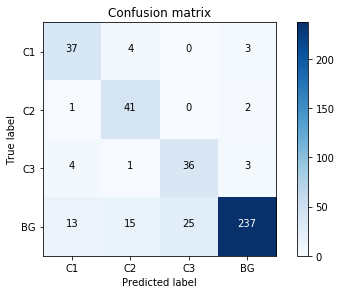

In [21]:
confusion_matrix_1 = np.array([
    [37,4,0,3],
    [1,41,0,2],
    [4,1,36,3],
    [13,15,25,237]
])
plot_confusion_matrix(confusion_matrix_1, ['C1', 'C2', 'C3', 'BG'])

## Box Proposals

### Sliding Window

#### Why?
1. Very clean output due to the definition of pre-selected scales.

#### Why not?
1. Not very reliable.
2. Very slow. We need many scales.

<img src="SVM_SLIDING.jpeg" />

### Selective Search

Why?
1. Fast.
2. No over-engineering or previous knowledge of the problem is needed.

Why not?
1. Hell lot of noise!!

#### Fixing Noise
1. Skip all windows less than 1% of the window size.
2. Skip all windows bigger than 25% of the window.

#### Still Not Working! HOG is sensitive to non-square boxes.
1. Then, make all rectangles as squares by using their bigger dimension.
2. For images on the borders, we do pad the images using zeros.

<img src="selsearch.jpeg" />

### Non-Maximum Suppression
1. Don't suppress the maximum confidence.
2. Apply NMS per class.
3. Overlap threshold is 0.3

#### Overlap: Intersection Over Union
$$
\text{Overlap} = \frac{
    B_1 \cap B_2
}{
    B_1 \cup B_2
}
$$
#### Overlap: Intersection Over Max Area
$$
\text{Overlap} = \frac{
    B_1 \cap B_2
}{
    max(B_1, B_2)
}
$$

## Data Augmentation
1. Rotation: 90, 180, 270
2. Flipping On All Images (at all rotation values)

## Bonus: Other Classifiers?

In [46]:
experiment = [
    ('SVM-Lin', 98.0851),
    ('RF-128', 98.4558),
    ('Log. Reg.', 77.1724)
]

dfBenchmarkClassifier  = pd.DataFrame(experiment, columns=[
    'Classifier', 'Accuracy'
])

In [59]:
dfBenchmarkClassifier

,Classifier,Accuracy
0,SVM-Lin,98.0851
1,RF-128,98.4558
2,Log. Reg.,77.1724


Text(0.5,1,'Which is better?')

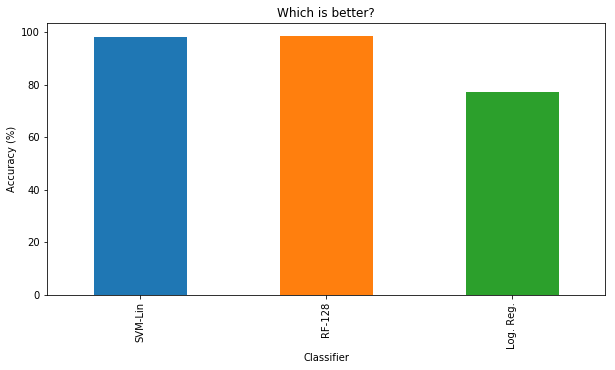

In [47]:
ax = plt.gca()

ax.figure.set_size_inches(10,5)

dfBenchmarkClassifier.plot(
    x='Classifier', 
    y='Accuracy', 
    kind='bar', 
    legend=False, 
    ax=ax
)

ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Classifier')
ax.set_title('Which is better?')